
--- Complex Text Generator Simulation ---
Source text: the cat sat on the mat . the dog sat on the log . the dog chased the cat . the cat chased the mouse . the mouse ran away .

Generated (Simulation 1):
the mouse ran away . the mouse . the cat

Generated (Simulation 2):
the cat chased the mat . the cat sat on
---------------------------------------


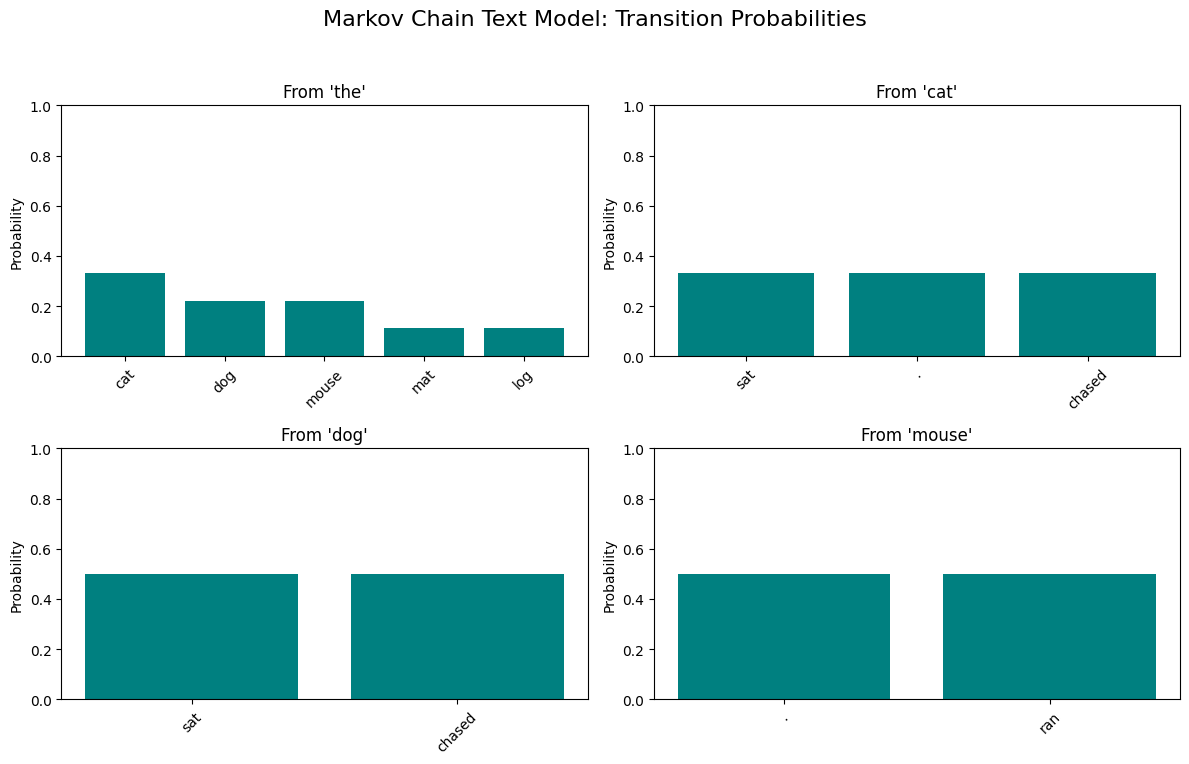

In [1]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# Model 2: Markov Text Generator (More Complex) with Visualization

class MarkovTextGenerator:
    """
    A Markov Chain model for generating text.
    The "state" is the current word.
    The "transitions" are the probabilities of which word will come next.
    """

    def __init__(self):
        self.transitions = defaultdict(Counter)
        self.probabilities = defaultdict(dict)
        self.start_words = []

    def train(self, text):
        """
        Builds the transition matrix by analyzing the source text.
        """
        words = text.split()
        if not words:
            return

        self.start_words.append(words[0])

        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i+1]

            if current_word.endswith('.'):
                self.start_words.append(next_word)

            self.transitions[current_word][next_word] += 1

        for current_word, next_word_counts in self.transitions.items():
            total_transitions = sum(next_word_counts.values())
            for next_word, count in next_word_counts.items():
                self.probabilities[current_word][next_word] = count / total_transitions

        self.start_words = list(set(self.start_words))

    def generate_text(self, num_words, start_word=None):
        """
        Simulates the chain to generate new text.
        """
        if not self.probabilities:
            return "Model has not been trained."

        if start_word and start_word in self.probabilities:
            current_word = start_word
        else:
            current_word = random.choice(self.start_words)

        generated_text = [current_word]

        for _ in range(num_words - 1):
            if current_word not in self.probabilities:
                current_word = random.choice(self.start_words)

            next_words = list(self.probabilities[current_word].keys())
            probs = list(self.probabilities[current_word].values())

            current_word = random.choices(next_words, weights=probs, k=1)[0]
            generated_text.append(current_word)

        return ' '.join(generated_text)

# --- How to use the complex model ---
print("\n--- Complex Text Generator Simulation ---")
source_text = ("the cat sat on the mat . the dog sat on the log . "
               "the dog chased the cat . the cat chased the mouse . "
               "the mouse ran away .")

# 1. Create and train the model
text_model = MarkovTextGenerator()
text_model.train(source_text)

# 2. Run the simulation (generate text)
print(f"Source text: {source_text}\n")
print("Generated (Simulation 1):")
print(text_model.generate_text(10))

print("\nGenerated (Simulation 2):")
print(text_model.generate_text(10, start_word='the'))
print("---------------------------------------")

# --- Visualization for Model 2 ---
# Visualize transition probabilities for a few key words
words_to_visualize = ['the', 'cat', 'dog', 'mouse']

plt.figure(figsize=(12, 8))
plt.suptitle('Markov Chain Text Model: Transition Probabilities', fontsize=16)

for i, word in enumerate(words_to_visualize):
    if word in text_model.probabilities:
        next_word_probs = text_model.probabilities[word]
        # Sort to make the bar chart readable
        sorted_probs = sorted(next_word_probs.items(), key=lambda item: item[1], reverse=True)

        if sorted_probs: # Only plot if there are transitions
            next_words = [item[0] for item in sorted_probs]
            probabilities = [item[1] for item in sorted_probs]

            ax = plt.subplot(2, 2, i + 1) # Create a subplot for each word
            ax.bar(next_words, probabilities, color='teal')
            ax.set_title(f"From '{word}'")
            ax.set_ylabel('Probability')
            ax.set_ylim(0, 1) # Probabilities are between 0 and 1
            ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels if they overlap

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()